In [1]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Cell 2: Load dataset
raw_df = pd.read_csv("KaggleV2-May-2016.csv.zip")

# Make a copy for cleaning
df = raw_df.copy()
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Cell 3: Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [4]:
# Cell 4: Handle missing values
# Drop rows only if critical info is missing
df = df.dropna(subset=['ScheduledDay', 'AppointmentDay', 'Age', 'Gender'])


In [5]:
# Cell 5: Remove duplicate rows
df = df.drop_duplicates()


In [6]:
# Cell 6: Standardize text columns
# Gender
df['Gender'] = df['Gender'].str.upper().str.strip()
df['Gender'] = df['Gender'].map({'F': 'Female', 'M': 'Male'})

# Neighbourhood
df['Neighbourhood'] = df['Neighbourhood'].str.title().str.strip()


In [7]:
# Cell 7: Convert date columns and create new feature
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Create waiting days feature
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Remove invalid waiting days (negative values)
df = df[df['WaitingDays'] >= 0]


In [8]:
# Cell 8: Clean age column
df = df[(df['Age'] >= 0) & (df['Age'] <= 115)]


In [9]:
# Cell 9: Clean column names
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.rename(columns={'no-show': 'no_show'}, inplace=True)


In [13]:
# Cell 10: Save and download cleaned dataset
df.to_csv("cleaned_medical_appointments.csv", index=False)

from google.colab import files
files.download("cleaned_medical_appointments.csv")

print(" Cleaning complete! Cleaned dataset saved and downloaded as 'cleaned_medical_appointments.csv'.")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Cleaning complete! Cleaned dataset saved and downloaded as 'cleaned_medical_appointments.csv'.


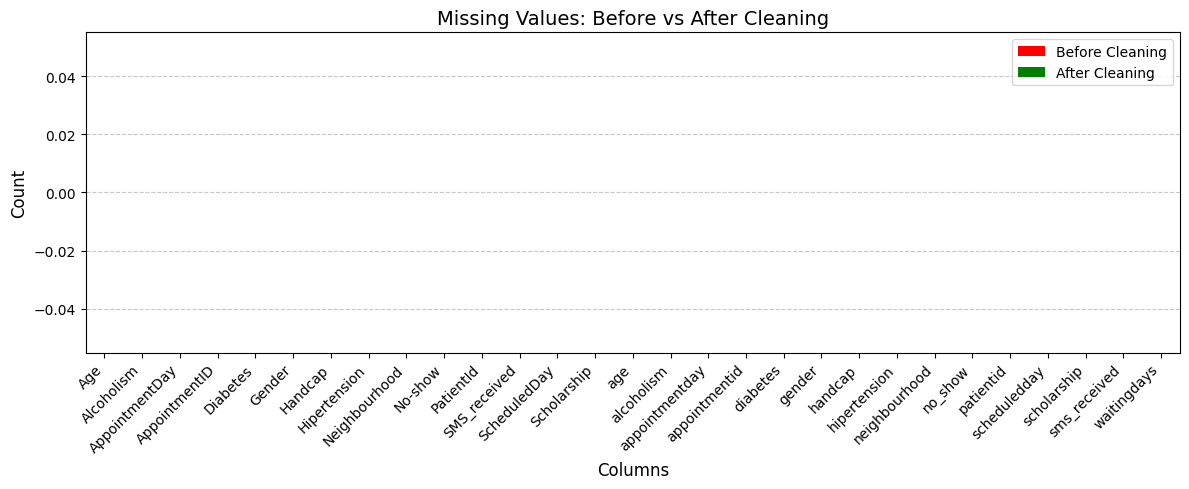

In [14]:
# Cell 11: Compare raw vs cleaned dataset (missing values)
clean_df = pd.read_csv("cleaned_medical_appointments.csv")

# Missing values check
raw_missing = raw_df.isnull().sum()
clean_missing = clean_df.isnull().sum()

missing_df = pd.DataFrame({
    "Before Cleaning": raw_missing,
    "After Cleaning": clean_missing
})

# Plot comparison
ax = missing_df.plot(kind='bar', figsize=(12,5), color=['red', 'green'])
plt.title("Missing Values: Before vs After Cleaning", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can see a significant drop in missing values after cleaning, making the dataset much cleaner and ready for analysis.

In [15]:
print("Raw dataset shape:", raw_df.shape)
print("Cleaned dataset shape:", df.shape)


Raw dataset shape: (110527, 14)
Cleaned dataset shape: (71959, 15)


Basic dataset shape comparison:
Show how many rows/columns you had before vs after cleaning.

In [16]:
print("\nQuick Stats After Cleaning:")
print(df[['age', 'gender', 'waitingdays']].describe(include='all'))



Quick Stats After Cleaning:
                 age  gender   waitingdays
count   71959.000000   71959  71959.000000
unique           NaN       2           NaN
top              NaN  Female           NaN
freq             NaN   48070           NaN
mean       38.502564     NaN     14.642018
std        22.925421     NaN     16.494334
min         0.000000     NaN      0.000000
25%        19.000000     NaN      3.000000
50%        39.000000     NaN      8.000000
75%        57.000000     NaN     21.000000
max       115.000000     NaN    178.000000


In [18]:
# Cell 13: Print summary of cleaning steps
summary = """
 Data Cleaning Summary
------------------------
1. Removed missing values from critical columns (ScheduledDay, AppointmentDay, Age, Gender).
2. Removed duplicate rows.
3. Standardized text:
   - Gender → converted to 'Female' and 'Male'
   - Neighbourhood → formatted to Title Case
4. Converted ScheduledDay & AppointmentDay to datetime format.
5. Created new feature 'WaitingDays' (days between scheduling and appointment).
6. Removed rows with invalid waiting days (negative values).
7. Removed invalid ages (less than 0 or greater than 115).
8. Renamed all column names to lowercase with underscores (e.g., 'No-show' → 'no_show').
9. Exported cleaned dataset as 'cleaned_medical_appointments.csv'.
"""

print(summary)



 Data Cleaning Summary
------------------------
1. Removed missing values from critical columns (ScheduledDay, AppointmentDay, Age, Gender).
2. Removed duplicate rows.
3. Standardized text:
   - Gender → converted to 'Female' and 'Male'
   - Neighbourhood → formatted to Title Case
4. Converted ScheduledDay & AppointmentDay to datetime format.
5. Created new feature 'WaitingDays' (days between scheduling and appointment).
6. Removed rows with invalid waiting days (negative values).
7. Removed invalid ages (less than 0 or greater than 115).
8. Renamed all column names to lowercase with underscores (e.g., 'No-show' → 'no_show').
9. Exported cleaned dataset as 'cleaned_medical_appointments.csv'.

